## 영상의 기하학적 변환

<어파인 변환>  
영상의 평행이동, 확대 및 축소, 회전 등의 기하학적 변환

- 리사이즈  
  cv2.resize(img, dsize, fx, fy, interpolation)  
  img – Image  
  dsize – (가로, 세로)  
  fx – 가로 사이즈의 배수. 2배로 크게하려면 2. 반으로 줄이려면 0.5  
  fy – 세로 사이즈의 배수  
  interpolation – 보간법. 크기 조절시 픽셀 처리 방법 지정  

In [1]:
import cv2
import numpy as np

img = cv2.imread('c.jpg')
h, w, c = img.shape

#cv2.INTER_AREA: 축소에 적합한 보간법
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

#cv2.INTER_CUBIC: 3차 보간법. 고화질
zoom1 = cv2.resize(img, (w*2, h*2), interpolation=cv2.INTER_CUBIC)

# 배수 Size지정
zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)


cv2.imshow('Origianl', img)
cv2.imshow('Shrink', shrink)
cv2.imshow('Zoom1', zoom1)
cv2.imshow('Zoom2', zoom2)

cv2.waitKey(0)
cv2.destroyAllWindows()

- 위치변환  
  cv2.warpAffine(src, M, dsize)  
  src – Image  
  M – 변환 행렬  
  dsize – (가로, 세로)  

In [3]:
import cv2
import numpy as np

img = cv2.imread('d.jpg')
h,w,c = img.shape

# 변환 행렬, X축으로 100, Y축으로 200 이동
M = np.float32([[1,0,100],[0,1,200]])

dst = cv2.warpAffine(img, M,(w, h))
cv2.imshow('Original', img)
cv2.imshow('Translation', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

- 이미지 회전  
  cv2.getRotationMatrix2D(center, angle, scale) => M(변환행렬) 반환  
  center – 이미지의 중심 좌표  
  angle – 회전 각도  
  scale – 이미지 변환 크기  

In [6]:
import cv2

img = cv2.imread('c.jpg')

h, w, c = img.shape

# 이미지의 중심점을 기준으로 90도 회전 하면서 0.5배 Scale
M= cv2.getRotationMatrix2D((w/2, h/2),90, 0.5)

dst = cv2.warpAffine(img, M,(w, h))

cv2.imshow('Original', img)
cv2.imshow('Rotation', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

- 대칭변환  
  이미지를 좌우, 상하로 반전
  
cv2.flip(img, mode)  
mode - 1은 좌우, 0은 상하 반전

In [7]:
import cv2

img = cv2.imread('c.jpg')

img1 = cv2.flip(img, 1)
img2 = cv2.flip(img, 0)

cv2.imshow('img', img)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

<투시변환>  

- Affine Transformation  
  선의 평행성은 유지가 되면서 이미지를 변환하는 작업

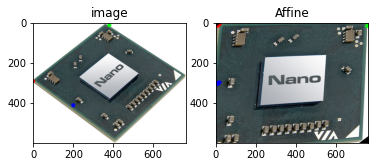

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('nano.jpg')
h, w, c = img.shape
'''
b, g, r = cv2.split(img)  
img = cv2.merge([r,g,b])
'''
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pts1 = np.float32([[0,290],[380,10],[200,410]]) # 원본 이미지의 점(변환의 기준점)
pts2 = np.float32([[10,10],[760,10],[10,300]])  # 변환의 기준점이 이동할 지점. 즉 [0,290] -> [10,10]

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (0,290), 10, (255,0,0),-1) # 빨간 점
cv2.circle(img, (380,10), 10, (0,255,0),-1) # 녹색 점
cv2.circle(img, (200,410), 10, (0,0,255),-1) # 파란 점

M = cv2.getAffineTransform(pts1, pts2) # 세개의 점이 변환되는 값을 알려주면 이걸 기준으로 변환행렬 생성

dst = cv2.warpAffine(img, M, (w, h)) # 이미지와 변환행렬의 연산으로 원하는 객체의 위치를 변환

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

- Perspective(원근) Transformation  
  변환은 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환
  
변환 행렬 생성 함수  
cv2.getPerspectiveTransform(입력 4개 좌표, 결과 4개 좌표)  
=> 변환 행렬 반환 M(3x3)  

원근 변환 함수  
cv2.warpPerspective(img, M, (가로, 세로))  

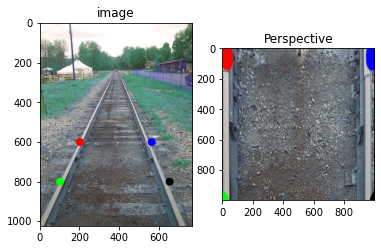

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('perspective.jpg')
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[200,600],[100, 800],[560, 600],[650,800]]) # 원점

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]]) # 원점이 변화될 좌표

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (200,600), 20, (255,0,0),-1)
cv2.circle(img, (100, 800), 20, (0,255,0),-1)
cv2.circle(img, (560, 600), 20, (0,0,255),-1)
cv2.circle(img, (650,800), 20, (0,0,0),-1)

# 커널 역할
M = cv2.getPerspectiveTransform(pts1, pts2) # 원점과 변환좌표를 넣어주면, 변환 행렬을 반환
 
dst = cv2.warpPerspective(img, M, (1000, 1000)) # 이미지와 변환 행렬을 연산하면 변환 이미지 반환

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

In [10]:
img.shape

(1024, 768, 3)

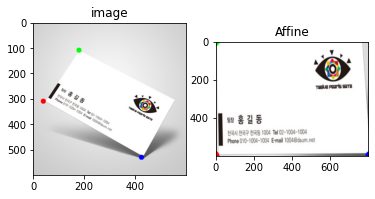

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('business_card.jpg', cv2.IMREAD_COLOR)
h, w, c = img.shape
'''
b, g, r = cv2.split(img)  
img = cv2.merge([r,g,b])
'''
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pts1 = np.float32([[40,310],[180,110],[425,530]]) # 원본 이미지의 점(변환의 기준점)
pts2 = np.float32([[0,600],[0,0],[800,600]])  # 변환의 기준점이 이동할 지점. 즉 [0,290] -> [10,10]

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (40,310), 10, (255,0,0),-1) # 빨간 점
cv2.circle(img, (180,110), 10, (0,255,0),-1) # 녹색 점
cv2.circle(img, (425,530), 10, (0,0,255),-1) # 파란 점

M = cv2.getAffineTransform(pts1, pts2) # 세개의 점이 변환되는 값을 알려주면 이걸 기준으로 변환행렬 생성

dst = cv2.warpAffine(img, M, (w+200, h)) # 이미지와 변환행렬의 연산으로 원하는 객체의 위치를 변환


plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

In [3]:
cv2.imshow('test1',img)
cv2.imshow('test',dst)

cv2.waitKey(0)   #키보드 입력 대기. 입력한 키값 반환
cv2.destroyAllWindows()  #모든 윈도우 창 닫음

In [58]:
from PIL import Image
from pytesseract import *

filename = "text_recog.png"
image = Image.open(filename)
text = image_to_string(image)
# text = image_to_string(image, lang="kor")
print(text)

from PIL import Image
from pytesseract import *

filename = "text_recog,jpg”

image = Image.open(filename)

text = image_to_string(image, lang="kor")
print(text)

C:WUsersWPlaydataWAppDataWLocalWProgramsWPythonwPython39WlibWsite-packagesWpytesseract!
Ames SH4 +S us AS

#tesseract_cmd = ‘tesseract’

tesseract_cmd = ‘C:¥i¥Program FilesWiWTesseract-OCRWitesseract.exe’

 



In [4]:
from PIL import Image
from pytesseract import *

filename = "text_korean.png"
image = Image.open(filename)
text = image_to_string(image)
# text = image_to_string(dst, lang="kor")
print(text)

7ELECHEFOPEEAY



명함집 앱

1. 명함 이미지 읽음
2. 명함 어파인 변환 (정면으로 오게)
3. 텍스트 인식
4. 텍스트 출력

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('business_card.jpg', cv2.IMREAD_GRAYSCALE)
# h, w, c = img.shape

cv2.imshow('test1',img)
# cv2.imshow('test',dst)

cv2.waitKey(0)   #키보드 입력 대기. 입력한 키값 반환
cv2.destroyAllWindows()  #모든 윈도우 창 닫음